<a href="https://colab.research.google.com/github/srihariyaswanth/Zomato-Data-Analysis/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YBI INTERNSHIP PROJECT
ZOMATO DATA ANALYSIS USING PYTHON


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Zomato-data-.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
#Data cleaning - removing denom for rating out of 5
def Handlerate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply(Handlerate)
df.head()



,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

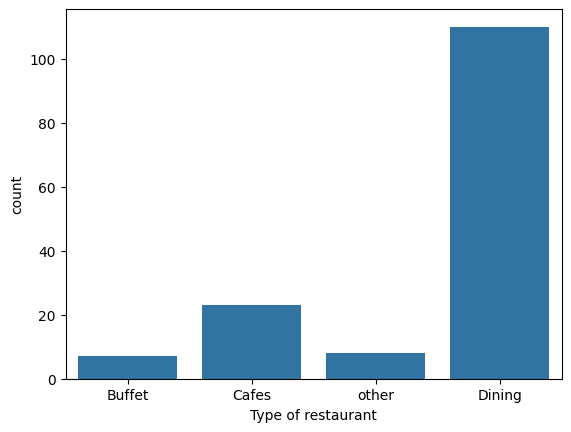

In [ ]:
#Type of Restaurent
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Conclusion: Dining restaurants are preferred by a larger number of individuals


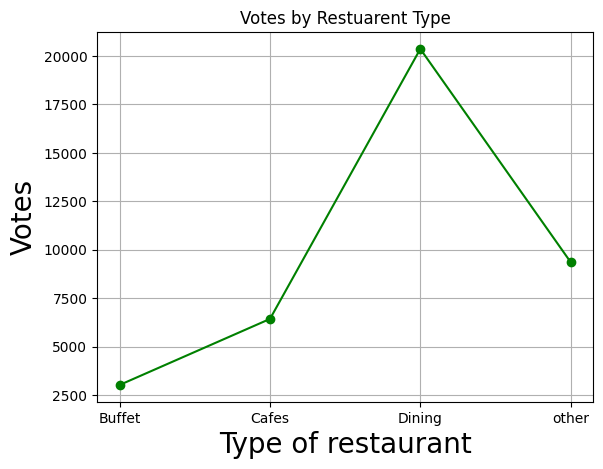

In [ ]:
#Votes by Restaurant Type
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.title("Votes by Restuarent Type")
plt.grid(True)
plt.xlabel('Type of restaurant',  size=20)
plt.ylabel('Votes',  size=20)
print("Conclusion: Dining restaurants are preferred by a larger number of individuals")

In [ ]:
# #Most Voted Restuarents
# max_votes=df['votes'].max()
# rw_max_votes=df.loc[df['votes']==max_votes,'name']
# print("Restuarents with max votes :")
# rw_max_votes
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Text(0.5, 0, 'Online Order Availability')

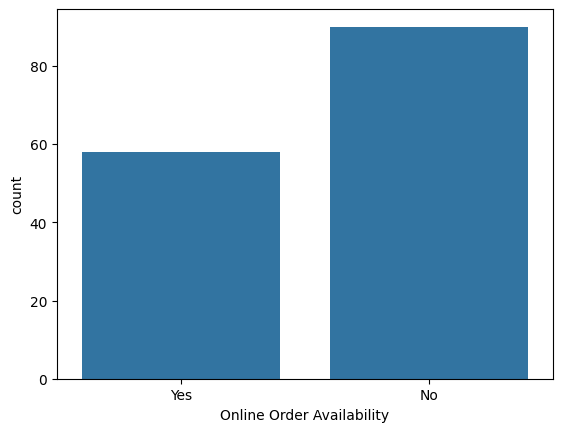

In [ ]:
#Online Order Availability
sns.countplot(x=df['online_order'])
plt.xlabel('Online Order Availability')

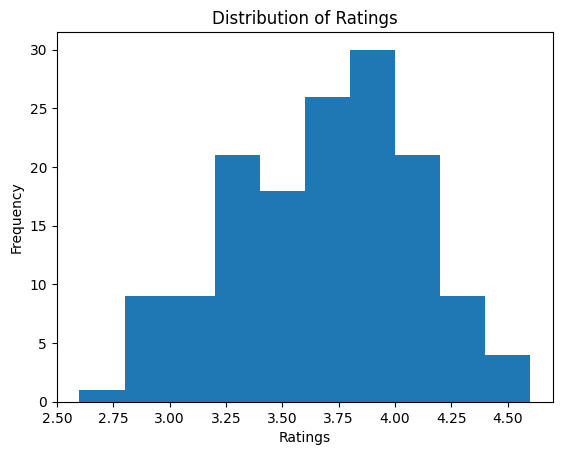

The majority of restaurants received ratings ranging from 3.5 to 4.


In [ ]:
#Analyze Ratings
plt.hist(df['rate'],bins=10)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
print("The majority of restaurants received ratings ranging from 3.5 to 4.")

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.


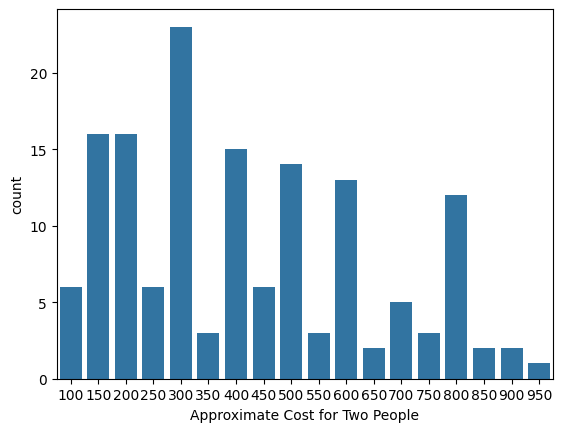

In [ ]:
#Approximate Cost for Couples
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Approximate Cost for Two People')
print("Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.")

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.


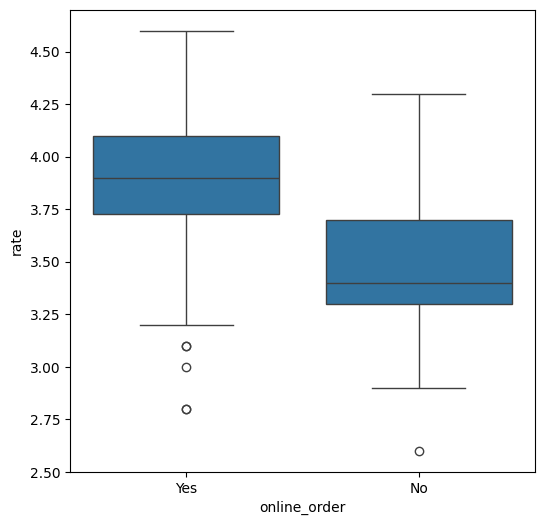

In [ ]:
#Ratings Comparison - Online vs Offline Orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
print("Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.")

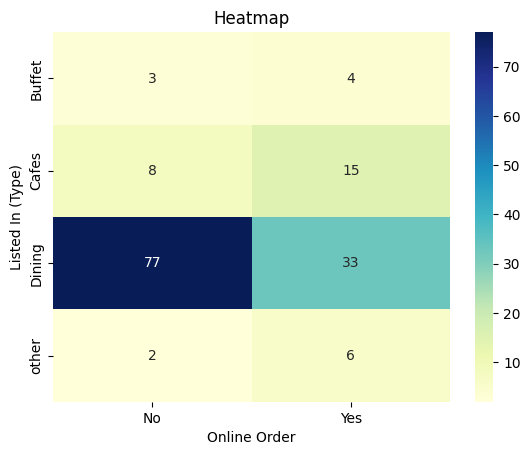

Conclusion: Dining restaurants primarily accept offline orders whereas 

cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.


In [ ]:
#Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
print("Conclusion: Dining restaurants primarily accept offline orders whereas \n" )
print("cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.")